In [1]:
# for data analysis
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn

In [29]:
# for visualizations
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# data extract, explore and understand
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic.info() # also observe the number of missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [15]:
titanic.nunique() #no. of unique values in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### some questions
1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc) <br>
2.) What deck were the passengers on and how does that relate to their class? <br>
3.) Where did the passengers come from? <br>
4.) Who was alone and who was with family? <br>
5.) What factors helped someone survive the sinking? <br>

In [28]:
passenger_info = titanic[['PassengerId','Name','Age','Sex']]
passenger_info.set_index('PassengerId')

,Name,Age,Sex
PassengerId,,,
1,"Braund, Mr. Owen Harris",22.0,male
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
3,"Heikkinen, Miss. Laina",26.0,female
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
5,"Allen, Mr. William Henry",35.0,male
...,...,...,...
887,"Montvila, Rev. Juozas",27.0,male
888,"Graham, Miss. Margaret Edith",19.0,female
889,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female


<AxesSubplot:ylabel='Frequency'>

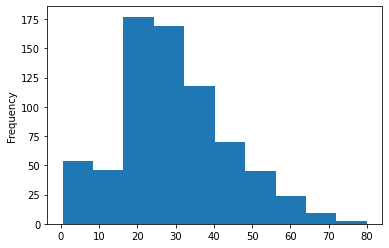

In [44]:
titanic['Age'].plot(kind='hist',bins=10) #numerical variable

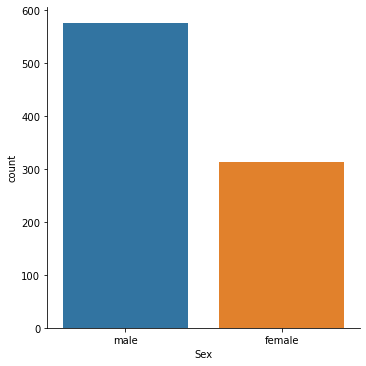

In [49]:
sns.catplot(x='Sex',data=titanic,kind='count') #seaborn.factorplot() method is used to draw a categorical plot onto a FacetGrid

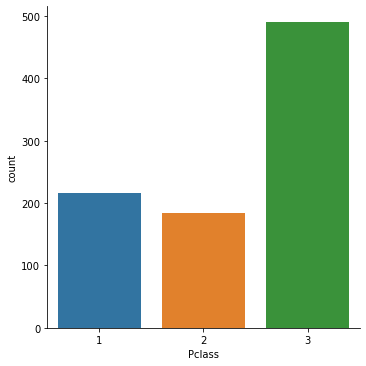

In [50]:
sns.catplot(x='Pclass',data=titanic,kind='count')

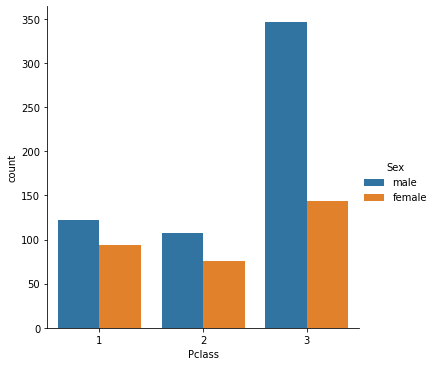

In [51]:
sns.catplot(x='Pclass',data=titanic,hue='Sex',kind='count')

In [54]:
# a function for creating a column consisting of male,female and child
def male_female_child(AgeSex):
    age,sex = AgeSex
    if age < 16:
        return 'Child'
    else:
        return sex
titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,axis=1)
titanic
#axis=1 for unpacking across columns.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male


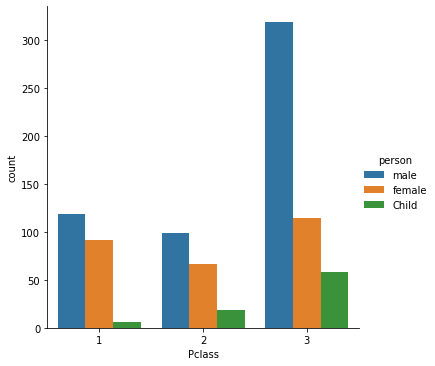

In [55]:
sns.catplot(x='Pclass',data=titanic,kind='count',hue='person')

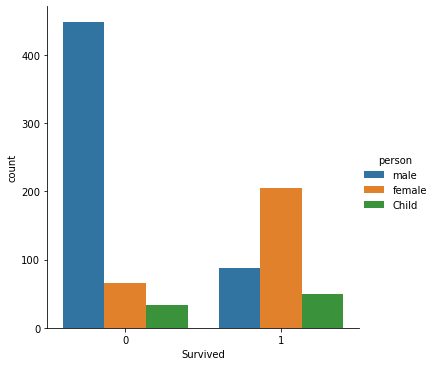

In [56]:
sns.catplot(x='Survived',data=titanic,hue='person',kind='count')

In [ ]:
# from the above we can observe that from the people who died most were male while female and children were comparitively less.
# From the people who survived most were female. This shows female and children could have been prioritized for saving.